In [7]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [8]:
# Load the dataset
data = pd.read_csv(r'C:\Users\Aniket Vijay Ubale\Downloads\Mall_Customers.csv')

In [9]:
# Display the first few rows of the dataset
print(data.head())
print(data.info())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


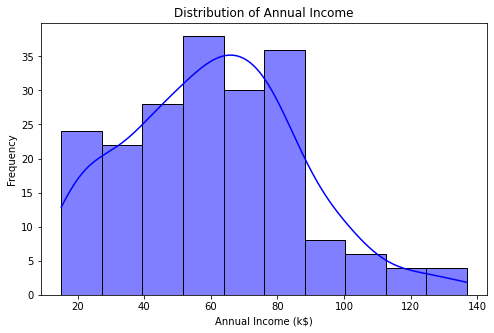

In [10]:
# Visualizing the dataset
# Plot 1: Distribution of Annual Income
plt.figure(figsize=(8, 5))
sns.histplot(data['Annual Income (k$)'], kde=True, color='blue')
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')
plt.show()

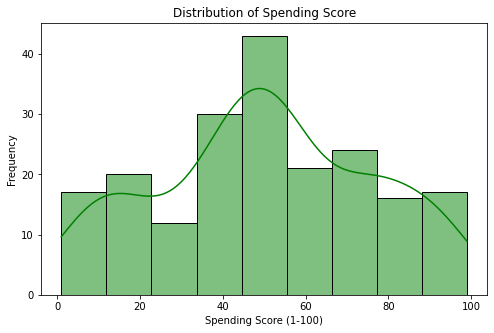

In [11]:
# Plot 2: Distribution of Spending Score
plt.figure(figsize=(8, 5))
sns.histplot(data['Spending Score (1-100)'], kde=True, color='green')
plt.title('Distribution of Spending Score')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')
plt.show()

In [12]:
# Preparing data for clustering
X = data[['Annual Income (k$)', 'Spending Score (1-100)']].values

In [13]:
# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
# Finding optimal number of clusters using elbow method
inertias = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)


C:\Users\Aniket Vijay Ubale\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


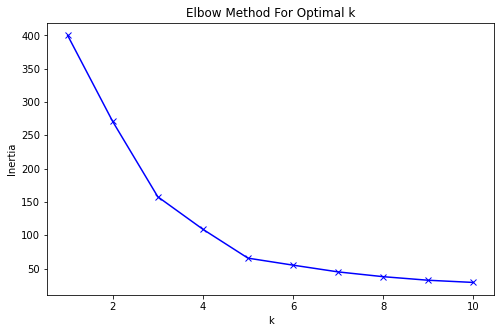

In [15]:

# Plotting elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()



In [16]:
# Performing K-means clustering with optimal k=5
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)



KMeans(n_clusters=5, random_state=42)

In [17]:
# Adding cluster labels to the dataset
data['Cluster'] = kmeans.labels_



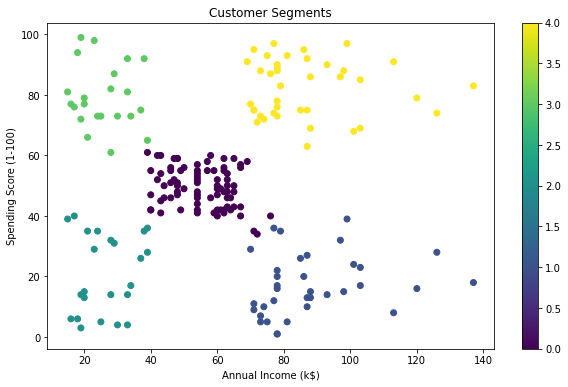

In [18]:
# Visualizing the clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], 
                     c=data['Cluster'], cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments')
plt.colorbar(scatter)
plt.show()

In [19]:
# Importing necessary libraries for hierarchical clustering
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Preparing the data
X = data[['Annual Income (k$)', 'Spending Score (1-100)']].values
X_scaled = StandardScaler().fit_transform(X)



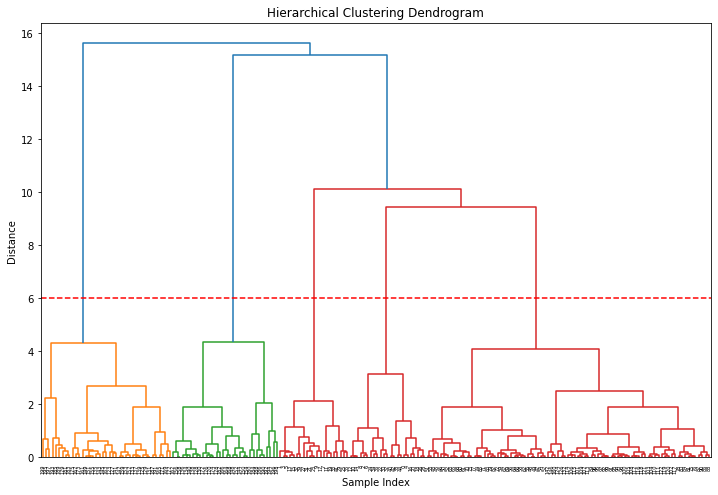

In [20]:
# Creating the linkage matrix using Ward's method
linkage_matrix = linkage(X_scaled, method='ward')

# Setting up the figure
plt.figure(figsize=(12, 8))

# Creating the dendrogram
dendrogram(linkage_matrix)

# Customizing the plot
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')

# Adding a horizontal line to suggest the number of clusters
plt.axhline(y=6, color='r', linestyle='--')

plt.show()


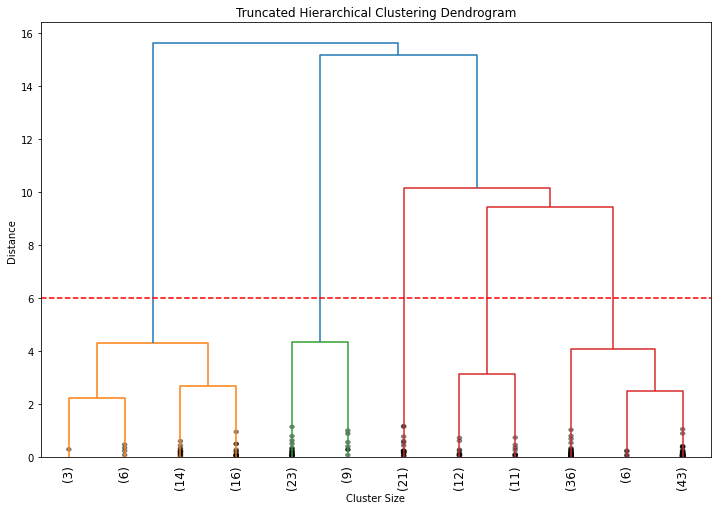

In [21]:

# Creating a more detailed dendrogram with truncation
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix,
           truncate_mode='lastp',  # show only the last p merged clusters
           p=12,  # show only the last p merged clusters
           show_leaf_counts=True,
           leaf_rotation=90.,
           leaf_font_size=12.,
           show_contracted=True)

plt.title('Truncated Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.axhline(y=6, color='r', linestyle='--')
plt.show()